In [2]:
# Data Paths
lidar_path = 'data/measurements/'
era5_path = 'data/reanalysis/'
turbines_existing_path = 'data/turbine-info/coordinates/existing/'
turbines_planned_future_path = 'data/turbine-info/coordinates/planned_future/'
turbines_planned_in_operation_before_2030_path = 'data/turbine-info/coordinates/planned_in_operation_before_2030/'
turbines_planned_netherlands_path = 'data/turbine-info/coordinates/planned_netherlands/'
turbines_area_of_interest_path = 'data/turbine-info/coordinates/area_of_interest/'
shapefiles_DEU_path = 'data/shapefiles/DEU/*'
shapefiles_DNK_path = 'data/shapefiles/DNK/*'
shapefiles_NLD_path = 'data/shapefiles/NLD/*'
turbine_power_curves_path = 'data/turbine-info/power_curves/'

In [3]:
import os
import numpy as np
import pandas as pd
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
# for plotting the farm Layout
import foxes
import foxes.variables as FV
import foxes.constants as FC
#pip install foxes

# Function to read and extract data from netcdf files
def read_netcdf(path):
    data = nc.Dataset(path, 'r')
    return data

# Function to read and extract data from csv files
def read_csv(path):
    data = pd.read_csv(path)
    return data

### Example and external turbines
- to compare our layout to
- faktor in external wake effects


Turbine 0, T0: 
Turbine 1, T1: 
Turbine 2, T2: 
Turbine 3, T3: 
Turbine 4, T4: 
Turbine 5, T5: 
Turbine 6, T6: 
Turbine 7, T7: 
Turbine 8, T8: 
Turbine 9, T9: 
Turbine 10, T10: 
Turbine 11, T11: 
Turbine 12, T12: 
Turbine 13, T13: 
Turbine 14, T14: 
Turbine 15, T15: 
Turbine 16, T16: 
Turbine 17, T17: 
Turbine 18, T18: 
Turbine 19, T19: 
Turbine 20, T20: 
Turbine 21, T21: 
Turbine 22, T22: 
Turbine 23, T23: 
Turbine 24, T24: 
Turbine 25, T25: 
Turbine 26, T26: 
Turbine 27, T27: 
Turbine 28, T28: 
Turbine 29, T29: 
Turbine 30, T30: 
Turbine 31, T31: 
Turbine 32, T32: 
Turbine 33, T33: 
Turbine 34, T34: 
Turbine 35, T35: 
Turbine 36, T36: 
Turbine 37, T37: 
Turbine 38, T38: 
Turbine 39, T39: 
Turbine 40, T40: 
Turbine 41, T41: 
Turbine 42, T42: 
Turbine 43, T43: 
Turbine 44, T44: 
Turbine 45, T45: 
Turbine 46, T46: 
Turbine 47, T47: 
Turbine 48, T48: 
Turbine 49, T49: 
Turbine 50, T50: 
Turbine 51, T51: 
Turbine 52, T52: 
Turbine 53, T53: 
Turbine 54, T54: 
Turbine 55, T55: 
Turbine 56, 

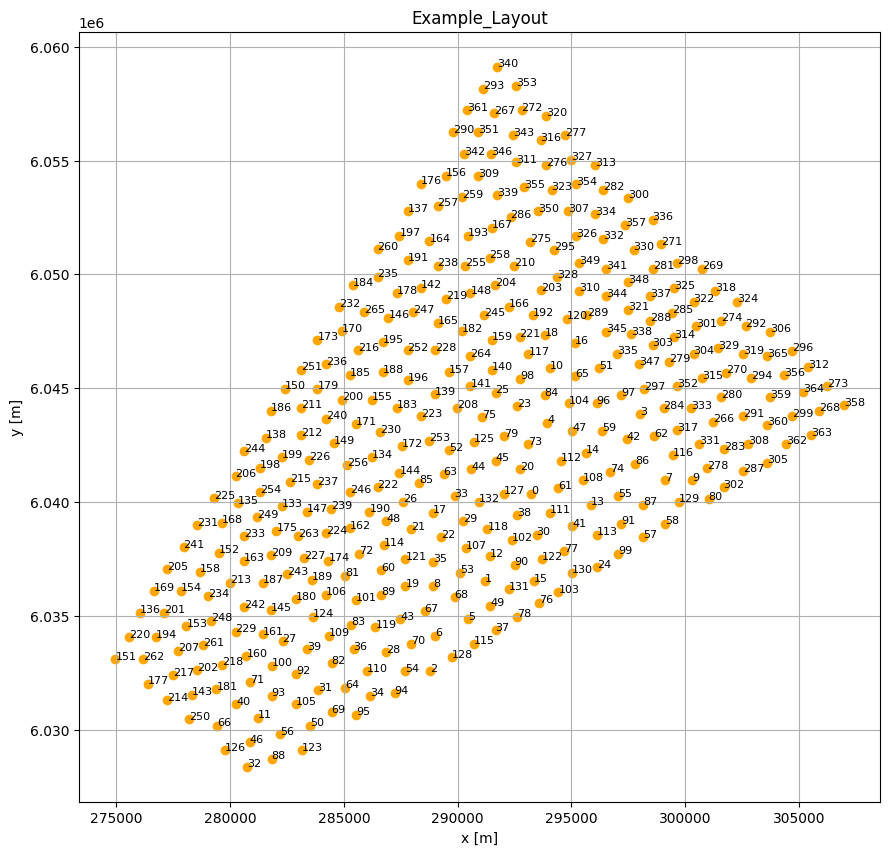

In [6]:

current_path =  turbines_area_of_interest_path
#current_path = turbines_existing_path
#current_path = turbines_planned_future_path
#current_path = turbines_planned_in_operation_before_2030_path
#current_path = turbines_planned_netherlands_path

# get the name of files in dir
turb_files = os.listdir(current_path)
# read files in path to dataframe and put's those in list 
dfs = [read_csv(current_path + file) for file in turb_files] #read files in path to dataframe and put's those in list 

farm = foxes.WindFarm(name="Example_Layout")
for dataframes in dfs:
     foxes.input.farm_layout.add_from_df(farm, dataframes) # also prints Turbines 'Turbine 0, T0: ' :(

# plot  with foxes
ax = foxes.output.FarmLayoutOutput(farm).get_figure(figsize=(17, 10))
plt.show()

### Layout Generation

In [7]:
import foxes.opt.problems.layout.geom_layouts as grg
from iwopy.interfaces.pymoo import Optimizer_pymoo        # some optimization Package idk

In [5]:
# No influenz from Wind conditions, just geometric Data

# 1. Create geo. boundary
corner_points = np.array(
    [[0, 1000], 
     [1400, 2600], 
     [4500, 3100], 
     [4200, 1300]], 
    dtype=np.float64
)
boundary = foxes.utils.geom2d.ClosedPolygon(corner_points)


farm = foxes.WindFarm(name="my_farm")